# Чтение данных

In [112]:
values_names = [
    'Численность персонала, занятого научными исследованиями и разработками',
    'Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации',
    'Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации',
    'Уровень инновационной активности организаций, по субъектам Российской Федерации',
    'Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг',
    'Затраты на инновационную деятельность организаций, по субъектам Российской Федерации',
    'Разработанные передовые производственные технологии по субъектам Российской Федерации'
]

In [113]:
print(*values_names)

Численность персонала, занятого научными исследованиями и разработками Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации Уровень инновационной активности организаций, по субъектам Российской Федерации Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг Затраты на инновационную деятельность организаций, по субъектам Российской Федерации Разработанные передовые производственные технологии по субъектам Российской Федерации


In [114]:
import pandas as pd

file_path = 'Regions.xlsx'


names = ['Sheet' + str(i) for i in range(1, 8)] 

# Создаем пустой DataFrame для объединения всех данных
region_col_name = "Region" 

# Создаем пустой DataFrame для объединения всех данных
combined_df = pd.read_excel(file_path, sheet_name = names[0])
columns = [values_names[0] + ' ' + str(i) for i in combined_df.columns]
columns[0] = 'Region'
combined_df.columns = columns.copy()

# Обработка каждого листа
for index, sheet in enumerate(names[1:]):
    df = pd.read_excel(file_path, sheet_name=sheet)
    df = df[['Region', 2015, 2016, 2017, 2018, 2019, 2020, 2021]]
    columns = [values_names[index + 1] + ' ' + str(i) for i in df.columns]
    columns[0] = 'Region'
    df.columns = columns.copy()
    combined_df = pd.merge(combined_df, df, how='left', on='Region')


combined_df.head()

,Region,"Численность персонала, занятого научными исследованиями и разработками 2010","Численность персонала, занятого научными исследованиями и разработками 2015","Численность персонала, занятого научными исследованиями и разработками 2016","Численность персонала, занятого научными исследованиями и разработками 2017","Численность персонала, занятого научными исследованиями и разработками 2018","Численность персонала, занятого научными исследованиями и разработками 2019","Численность персонала, занятого научными исследованиями и разработками 2020","Численность персонала, занятого научными исследованиями и разработками 2021","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2015","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2016","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2017","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2018","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2019","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2020","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2021",Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2015,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2016,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2017,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2018,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2019,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2020,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2021,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2015","Уровень инновационной активности организаций, по субъектам Российской Федерации 2016",...,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2018","Уровень инновационной активности организаций, по субъектам Российской Федерации 2019","Уровень инновационной активности организаций, по субъектам Российской Федерации 2020","Уровень инновационной активности организаций, по субъектам Российской Федерации 2021","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2015","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2016","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2017","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2018","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2019","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2020","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2021","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2015","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2016","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2017","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2018","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2019","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2020","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2021",Разработанные передовые производственные технологии по субъекта

# Заполнение пропусков средними

In [115]:
from sklearn.impute import SimpleImputer

regions = list(combined_df['Region'])
combined_df.drop(['Region'], axis = 1, inplace = True)
columns = combined_df.columns

imputer = SimpleImputer(strategy='mean')

df_imputed = pd.DataFrame(imputer.fit_transform(combined_df), columns=combined_df.columns)

# Нормализация данных

In [116]:
from sklearn.preprocessing import StandardScaler

# Инициализация StandardScaler
scaler = StandardScaler()

# Применение к данным
df_standardized = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df_imputed.columns)

# Кластеризация

In [117]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1337)


# Применение K-means из scikit-learn
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(df_standardized)

# Пример данных
result = {
    'Region': regions,
    'Cluster': clusters
}

# Создание DataFrame
result_knn = pd.DataFrame(result)
result_knn

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Region,Cluster
0,Белгородская область,0
1,Брянская область,2
2,Владимирская область,2
3,Воронежская область,0
4,Ивановская область,2
...,...,...
81,Приморский край,2
82,Хабаровский край,0
83,Амурская область,2
84,Магаданская область,2


In [118]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

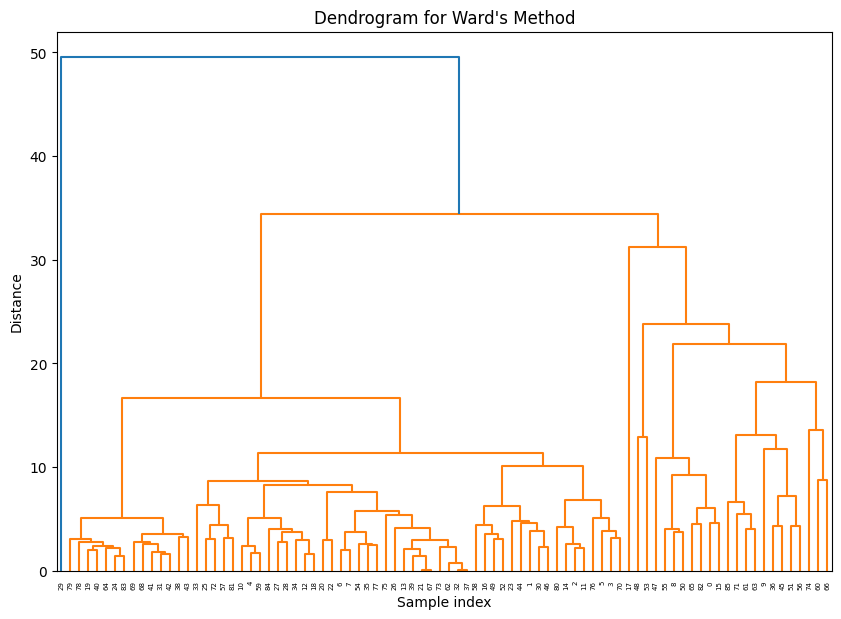

In [119]:
np.random.seed(1337)

# linkage выполняет иерархическую кластеризацию и возвращает координаты для дендрограммы
Z = linkage(df_standardized, method='ward')
plt.figure(figsize=(10, 7))
plt.title("Dendrogram for Ward's Method")
dendrogram(Z)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [120]:
cluster_labels = fcluster(Z, t=3, criterion='maxclust')

# Пример данных
result = {
    'Region': regions,
    'Cluster': cluster_labels
}

# Создание DataFrame
result_wards = pd.DataFrame(result)
result_wards

,Region,Cluster
0,Белгородская область,2
1,Брянская область,1
2,Владимирская область,1
3,Воронежская область,1
4,Ивановская область,1
...,...,...
81,Приморский край,1
82,Хабаровский край,2
83,Амурская область,1
84,Магаданская область,1


In [123]:
len(set(result_wards[result_wards['Cluster'] == 1]['Region']) & set(result_wards[result_knn['Cluster'] == 2]['Region']))

59

In [124]:
len(set(result_wards[result_wards['Cluster'] == 2]['Region']) & set(result_wards[result_knn['Cluster'] == 0]['Region']))

21

# Результаты

In [125]:
combined_df['Regions'] = regions
combined_df['Cluster'] = cluster_labels
combined_df[combined_df['Cluster'] == 1]

,"Численность персонала, занятого научными исследованиями и разработками 2010","Численность персонала, занятого научными исследованиями и разработками 2015","Численность персонала, занятого научными исследованиями и разработками 2016","Численность персонала, занятого научными исследованиями и разработками 2017","Численность персонала, занятого научными исследованиями и разработками 2018","Численность персонала, занятого научными исследованиями и разработками 2019","Численность персонала, занятого научными исследованиями и разработками 2020","Численность персонала, занятого научными исследованиями и разработками 2021","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2015","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2016","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2017","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2018","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2019","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2020","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2021",Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2015,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2016,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2017,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2018,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2019,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2020,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2021,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2015","Уровень инновационной активности организаций, по субъектам Российской Федерации 2016","Уровень инновационной активности организаций, по субъектам Российской Федерации 2017",...,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2020","Уровень инновационной активности организаций, по субъектам Российской Федерации 2021","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2015","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2016","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2017","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2018","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2019","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2020","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2021","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2015","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2016","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2017","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2018","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2019","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2020","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2021",Разработанные передовые производственные технологии по субъектам Российской Федерации 2015,Разработанные передовые производственные технологии по субъектам Р

In [126]:
print('Регионы отнесённые в первый кластер:')
print(*list(combined_df[combined_df['Cluster'] == 1]['Regions']), sep = ', ')

Регионы отнесённые в первый кластер:
Брянская область, Владимирская область, Воронежская область, Ивановская область, Калужская область, Костромская область, Курская область, Орловская область, Рязанская область, Смоленская область, Тамбовская область, Тверская область, Ярославская область, Республика Карелия, Республика Коми, Архангельская область, в том числе Ненецкий автономный округ, Архангельская область без АО, Вологодская область, Калинингpадская область, Ленинградская область, Мурманская область, Новгородская область, Псковская область, Республика Адыгея, Республика Калмыкия, Республика Крым2) , Краснодарский край, Астраханская область, Волгоградская область, г. Севастополь 2) , Республика Дагестан, Республика Ингушетия , Кабардино-Балкарская Республика, Карачаево-Черкесская Республика, Республика Северная Осетия - Алания, Чеченская Республика , Ставропольский край, Республика Марий Эл, Удмуртская Республика, Кировская область, Оренбургская область, Саратовская область, Ульянов

In [127]:
combined_df[combined_df['Cluster'] == 2]

,"Численность персонала, занятого научными исследованиями и разработками 2010","Численность персонала, занятого научными исследованиями и разработками 2015","Численность персонала, занятого научными исследованиями и разработками 2016","Численность персонала, занятого научными исследованиями и разработками 2017","Численность персонала, занятого научными исследованиями и разработками 2018","Численность персонала, занятого научными исследованиями и разработками 2019","Численность персонала, занятого научными исследованиями и разработками 2020","Численность персонала, занятого научными исследованиями и разработками 2021","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2015","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2016","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2017","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2018","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2019","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2020","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2021",Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2015,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2016,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2017,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2018,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2019,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2020,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2021,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2015","Уровень инновационной активности организаций, по субъектам Российской Федерации 2016","Уровень инновационной активности организаций, по субъектам Российской Федерации 2017",...,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2020","Уровень инновационной активности организаций, по субъектам Российской Федерации 2021","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2015","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2016","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2017","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2018","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2019","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2020","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2021","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2015","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2016","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2017","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2018","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2019","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2020","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2021",Разработанные передовые производственные технологии по субъектам Российской Федерации 2015,Разработанные передовые производственные технологии по субъектам Р

In [128]:
print('Регионы отнесённые во второй кластер:')
print(*list(combined_df[combined_df['Cluster'] == 2]['Regions']), sep = ', ')

Регионы отнесённые во второй кластер:
Белгородская область, Липецкая область, Московская область1), Тульская область, г. Москва1), Ростовская область, Республика Башкортостан, Республика Мордовия, Республика Татарстан, Чувашская Республика, Пермский край, Нижегородская область, Пензенская область, Самарская область, Свердловская область, Тюменская область, Ханты-Мансийский автономный округ - Югра, Тюменская область без АО, Челябинская область, Красноярский край, Новосибирская область, Хабаровский край, Сахалинская область


In [129]:
combined_df[combined_df['Cluster'] == 3]

,"Численность персонала, занятого научными исследованиями и разработками 2010","Численность персонала, занятого научными исследованиями и разработками 2015","Численность персонала, занятого научными исследованиями и разработками 2016","Численность персонала, занятого научными исследованиями и разработками 2017","Численность персонала, занятого научными исследованиями и разработками 2018","Численность персонала, занятого научными исследованиями и разработками 2019","Численность персонала, занятого научными исследованиями и разработками 2020","Численность персонала, занятого научными исследованиями и разработками 2021","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2015","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2016","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2017","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2018","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2019","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2020","Численность исследователей, имеющих ученую степень, по субъектам Российской Федерации 2021",Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2015,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2016,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2017,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2018,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2019,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2020,Внутренние затраты на научные исследования и разработки по субъектам Российской Федерации 2021,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2015","Уровень инновационной активности организаций, по субъектам Российской Федерации 2016","Уровень инновационной активности организаций, по субъектам Российской Федерации 2017",...,"Уровень инновационной активности организаций, по субъектам Российской Федерации 2020","Уровень инновационной активности организаций, по субъектам Российской Федерации 2021","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2015","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2016","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2017","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2018","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2019","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2020","Удельный вес инновационных товаров, работ, услуг в общем объеме отгруженных товаров, выполненных работ, услуг 2021","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2015","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2016","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2017","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2018","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2019","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2020","Затраты на инновационную деятельность организаций, по субъектам Российской Федерации 2021",Разработанные передовые производственные технологии по субъектам Российской Федерации 2015,Разработанные передовые производственные технологии по субъектам Р

In [130]:
print('Регионы отнесённые во второй кластер:')
print(*list(combined_df[combined_df['Cluster'] == 3]['Regions']), sep = ', ')

Регионы отнесённые во второй кластер:
г. Санкт-Петербург


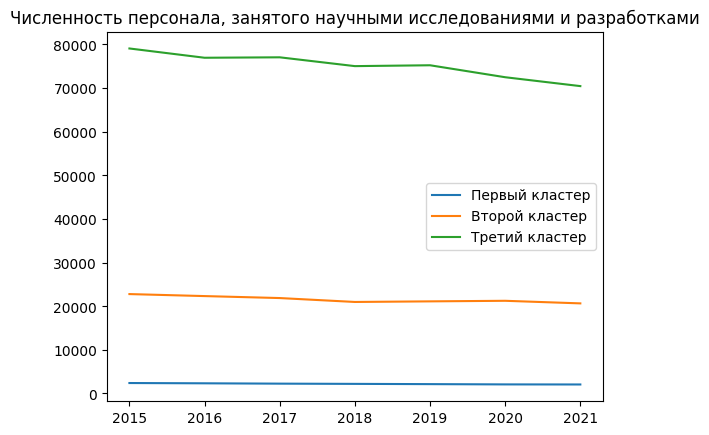

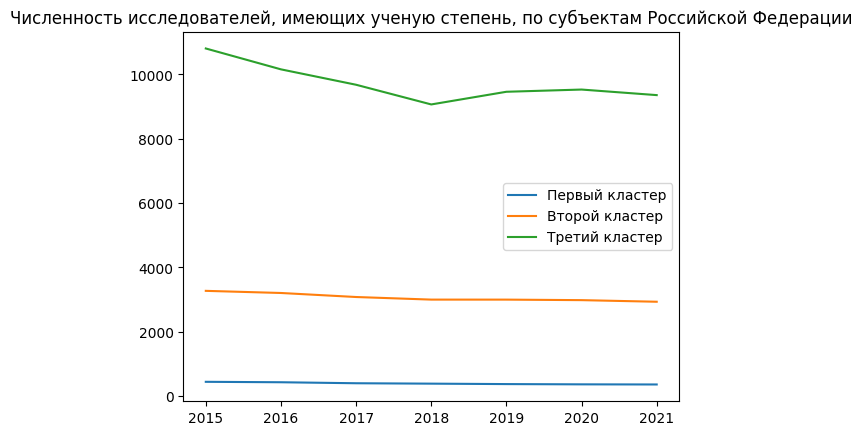

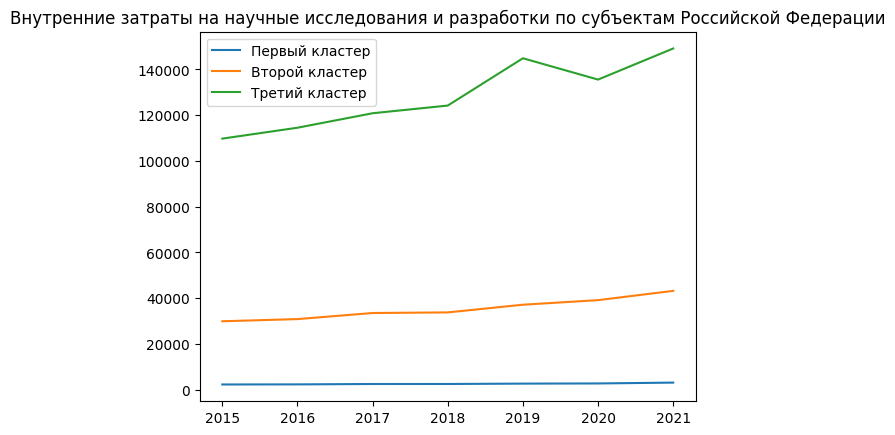

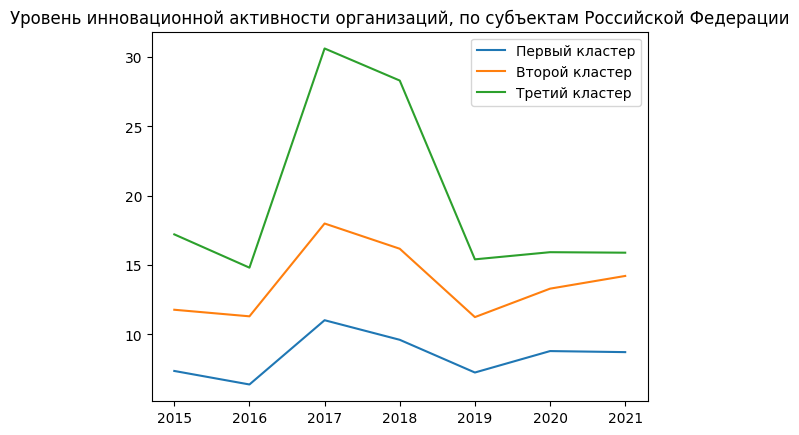

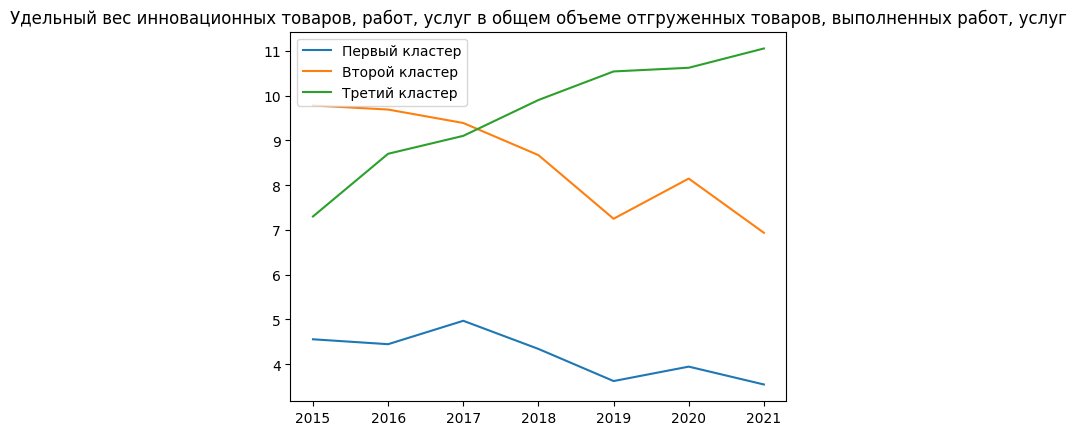

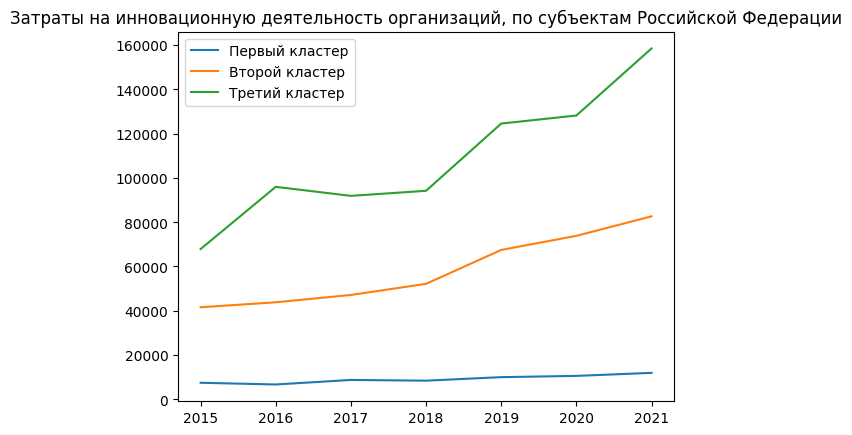

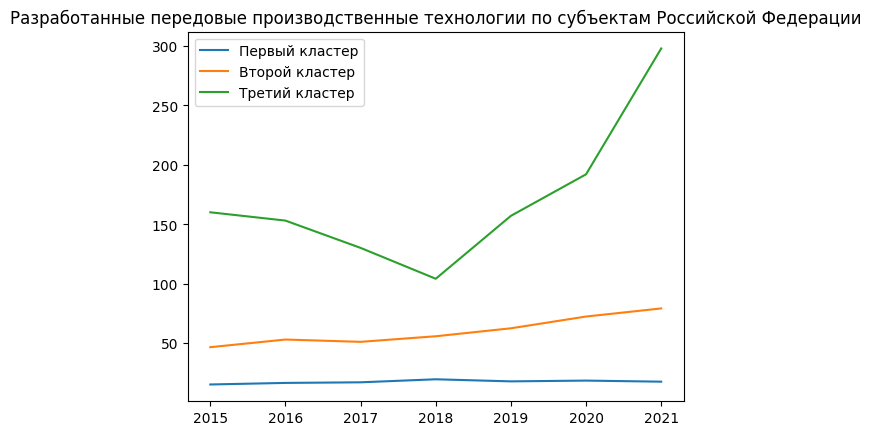

In [131]:
file_path = 'Regions.xlsx'


names = ['Sheet' + str(i) for i in range(1, 8)]  


# Обработка каждого листа
for index, sheet in enumerate(names):
    df = pd.read_excel(file_path, sheet_name=sheet)
    df = df[[2015, 2016, 2017, 2018, 2019, 2020, 2021]]
    df['Cluster'] = cluster_labels
    first = df[df['Cluster'] == 1][[2015, 2016, 2017, 2018, 2019, 2020, 2021]]
    second = df[df['Cluster'] == 2][[2015, 2016, 2017, 2018, 2019, 2020, 2021]]
    third = df[df['Cluster'] == 3][[2015, 2016, 2017, 2018, 2019, 2020, 2021]]
    
    plt.title(values_names[index])
    plt.plot([2015, 2016, 2017, 2018, 2019, 2020, 2021], first.mean(), label = 'Первый кластер')   
    plt.plot([2015, 2016, 2017, 2018, 2019, 2020, 2021], second.mean(), label = 'Второй кластер')
    plt.plot([2015, 2016, 2017, 2018, 2019, 2020, 2021], third.mean(), label = 'Третий кластер')
    plt.legend()
    plt.show()

